In [1]:
import cv2
import face_recognition
from PIL import Image,ImageDraw,ImageFont
import pandas as pd
import matplotlib.pyplot as plt
import pygame
import sys
import datetime

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# DATA LOAD MODULE-> data created manually in excel sheet.
f=pd.read_excel("Employee_data1.xlsx")
f.head()

,Employee_No,F_name,L_name,Photo_location,Audio_location
0,2822,Aishwarya,Rai,Employee_Pic/2822.jpeg,Audio_Files/employee_2822.mp3.mp3
1,2823,Kiara,Advani,Employee_Pic/2823.jpeg,Audio_Files/employee_2823.mp3.mp3
2,2824,Akshay,Kumar,Employee_Pic/2824.jpeg,Audio_Files/employee_2824.mp3
3,2825,Bill,Gates,Employee_Pic/2825.jpeg,Audio_Files/employee_2825.mp3.mp3
4,2826,Elon,Musk,Employee_Pic/2826.jpeg,Audio_Files/employee_2826.mp3.mp3


In [3]:
# Convert all features into list. 
emp_no=f["Employee_No"].tolist()
f_nam=f["F_name"].tolist()
l_nam=f["L_name"].tolist()
photo_loc=f["Photo_location"].tolist()
audio_loc=f["Audio_location"].tolist()
n=len(emp_no)# Number of employees in a loading list.
emp=[]
emp_encod=[]
audio=[]
for i in range(n):
    emp.append(face_recognition.load_image_file(photo_loc[i]))
    emp_encod.append(face_recognition.face_encodings(emp[i])[0])
#find encoding of each employee.

In [4]:
# FACE CAPTURE MODULE->Capture the face of the employee using camera.
camera=cv2.VideoCapture(0)
for i in range(10):# capture ten images of the employee
    return_value,image=camera.read()
    print(return_value,image.shape)
    cv2.imwrite("Employee"+str(i)+".png",image)
del camera    

uk=face_recognition.load_image_file("Employee5.png")


True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)
True (480, 640, 3)


In [5]:
#FACE RECOGNITION MODULE->Recognize the face captured.
"""Compare the capture image to the images available in the database.
This python function return index of that employee which matches
to the employee of the database.Otherwise,no matches return -1.""" 
def identify_employee(photo):
    try:
        uk_encode =face_recognition.face_encodings(photo)[0]
    except IndexError as e: 
        print(e)
        sys.exit(1)
    found=face_recognition.compare_faces(emp_encod,uk_encode,tolerance=0.5)   
    print(found)
    
    index=-1 
    for i in range(n):
        if found[i]:
            index=i
    return index
emp_index=identify_employee(uk)
print(emp_index)

[False, False, False, False, False, False, False, True]
7


In [6]:
#ATTENDANCE RECORD IN DATAFILE  NAME AS Attendance.txt
if(emp_index!=-1):
    x=str(datetime.datetime.now())
    eno=str(emp_no[emp_index])
    f=str(f_nam[emp_index])
    l=str(l_nam[emp_index])
    ar="\n"+eno+" "+f+" "+l+" "+x
    file=open("Attendance.txt","a")
    file.write(ar)
    file.close()
    print(ar)


2829 Gunjan Aggarwal 2021-11-18 00:24:58.461036


Gunjan Aggarwal


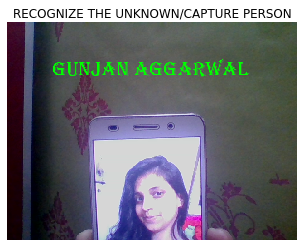

In [7]:
#DISPLAY ATTENDANCE MODULE.
pil_uk=Image.fromarray(uk)
font=ImageFont.truetype(r"C:\Users\dell user\Desktop\ALGER.TTF",size=45)
draw=ImageDraw.Draw(pil_uk)

if emp_index==-1:
    print("FACE NOT RECOGNISED")
else:
    name= f_nam[emp_index]+" "+l_nam[emp_index]
    
    x=100
    y=uk.shape[0]-400
    draw.text((x,y),name,font=font,fill=(0,255,0))
    plt.imshow(pil_uk)
    plt.axis("off")
    plt.title("RECOGNIZE THE UNKNOWN/CAPTURE PERSON")
    print(name)

In [8]:
#ANNOUNCE ATTENDANCE RECORDED MODULE->
"""If matches,then announce the name of recognised person.
Otherwise, announce not recognised message."""
audioloc=audio_loc[emp_index]
pygame.mixer.init()
if emp_index==-1:
    pygame.mixer.music.load("Audio_Files/failure.mp3.mp3")
    pygame.mixer.music.play()
else:
    pygame.mixer.music.load(audioloc)
    pygame.mixer.music.play()                       
    pygame.mixer.music.queue("Audio_Files/success.mp3")
    pygame.mixer.music.play()